In [181]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

In [182]:
df = pd.read_excel('Steady State CSTR.xlsx', sheet_name = 'Measured')

In [183]:
# from google.colab import drive
# drive.mount('/content/drive')

In [184]:
df

,Tj,Ca,T
0,9.016660,0.125230,50.025005
1,11.988202,0.124816,50.835348
2,14.725324,0.124380,51.711002
3,17.587401,0.123921,52.606495
4,19.957351,0.123439,54.292544
...,...,...,...
96,144.158475,0.013730,145.875412
97,146.970149,0.013194,147.108906
98,149.838082,0.012678,147.707456
99,152.161175,0.012182,148.756533


In [185]:
mean=np.mean(df,axis=0)
std=np.std(df,axis=0)
df=(df-mean)/std

In [186]:
df

,Tj,Ca,T
0,-2.197621,1.474096,-1.711836
1,-2.108196,1.463352,-1.684079
2,-2.025825,1.452036,-1.654084
3,-1.939693,1.440127,-1.623410
4,-1.868372,1.427599,-1.565657
...,...,...,...
96,1.869335,-1.420412,1.571410
97,1.953950,-1.434337,1.613662
98,2.040257,-1.447733,1.634164
99,2.110168,-1.460618,1.670099


In [187]:
x = np.array(df)

In [188]:
x

array([[-2.19762131e+00,  1.47409640e+00, -1.71183640e+00],
       [-2.10819574e+00,  1.46335199e+00, -1.68407902e+00],
       [-2.02582481e+00,  1.45203635e+00, -1.65408449e+00],
       [-1.93969348e+00,  1.44012650e+00, -1.62341038e+00],
       [-1.86837223e+00,  1.42759926e+00, -1.56565672e+00],
       [-1.77885709e+00,  1.41443124e+00, -1.54276322e+00],
       [-1.68501805e+00,  1.40059902e+00, -1.51006713e+00],
       [-1.62006832e+00,  1.38607916e+00, -1.47099011e+00],
       [-1.54144076e+00,  1.37084833e+00, -1.43732244e+00],
       [-1.45755355e+00,  1.35488343e+00, -1.40757063e+00],
       [-1.39242883e+00,  1.33816168e+00, -1.37373802e+00],
       [-1.32913302e+00,  1.32066078e+00, -1.34521649e+00],
       [-1.24208838e+00,  1.30235901e+00, -1.30700254e+00],
       [-1.17864490e+00,  1.28323537e+00, -1.28102458e+00],
       [-1.11834910e+00,  1.26326977e+00, -1.24538458e+00],
       [-1.04057067e+00,  1.24244317e+00, -1.18898573e+00],
       [-9.75396092e-01,  1.22073771e+00

In [189]:
m,n=np.shape(x)
U,S,VT=np.linalg.svd(x)
V=VT.T

In [190]:
var = []
sum=0
for i in S:
  sum+=i*i
var=(S**2/sum)*100
print("Variance provided by each components (In %):",var)

Variance provided by each components (In %): [9.77105479e+01 2.28810812e+00 1.34399623e-03]


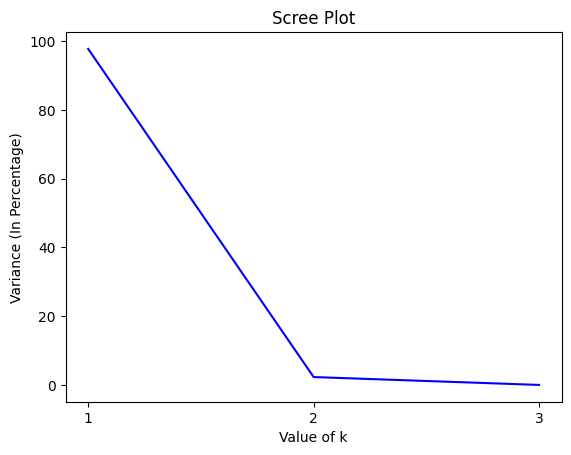

In [191]:
import numpy as np
import matplotlib.pyplot as plt

length = np.arange(1, len(var) + 1)
bar_width = 0.2

plt.plot(length, var, color='blue')
plt.xlabel('Value of k')
plt.ylabel('Variance (In Percentage)')
plt.title('Scree Plot')
plt.xticks(length)
plt.show()

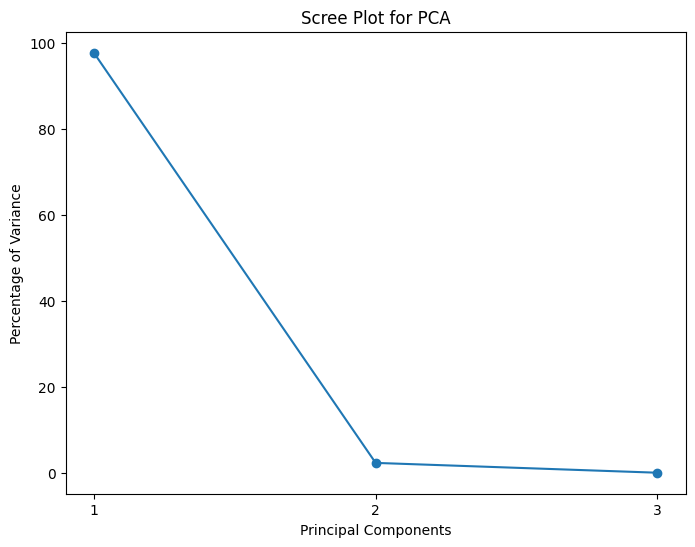

In [192]:
import numpy as np
import matplotlib.pyplot as plt
cov_matrix = np.cov(x, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

explained_variance_ratio = eigenvalues / np.sum(eigenvalues) * 100

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title('Scree Plot for PCA')
plt.xlabel('Principal Components')
plt.ylabel('Percentage of Variance')

plt.xticks(np.arange(1, len(explained_variance_ratio) + 1, 1))

plt.show()

In [193]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(df)

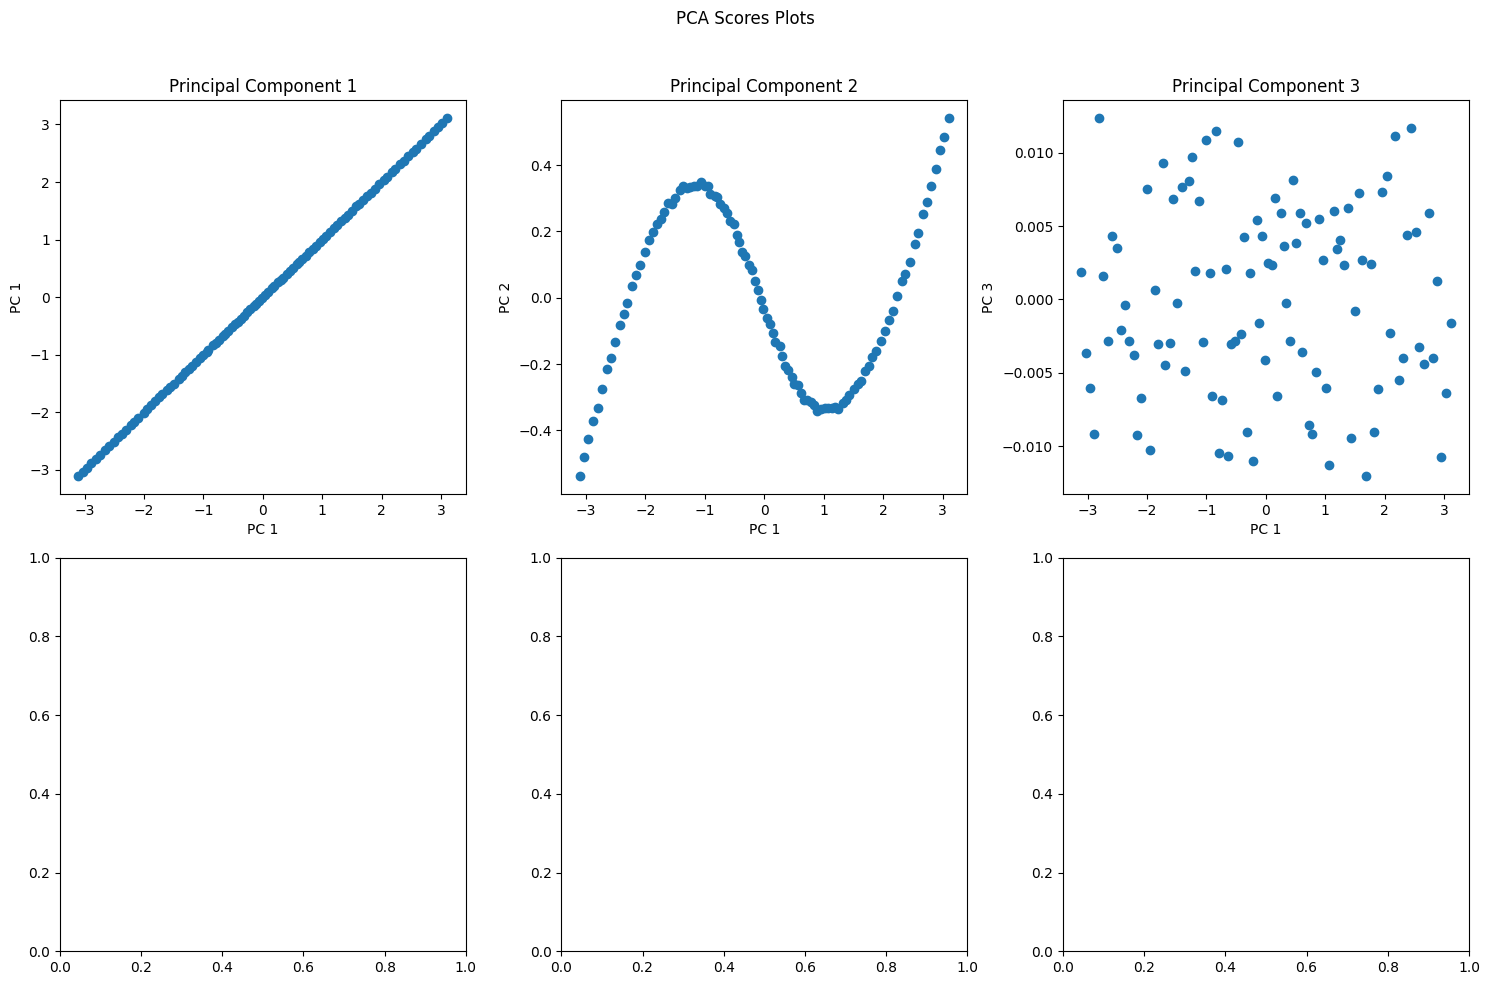

In [194]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('PCA Scores Plots')

for i, ax in enumerate(axes.flat):
    if i < pca.n_components_:
        ax.scatter(principal_components[:, 0], principal_components[:, i])
        ax.set_title(f'Principal Component {i+1}')
        ax.set_xlabel('PC 1')
        ax.set_ylabel(f'PC {i+1}')

        # Add text annotations with row numbers
        # for j in range(len(principal_components)):
        #     ax.text(principal_components[j, 0], principal_components[j, i], str(j+1), ha='center', va='center')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [195]:
from sklearn.metrics.pairwise import rbf_kernel
kernel_matrix = rbf_kernel(df.values, gamma=3)

row_means = np.mean(kernel_matrix, axis=1)
mean_centered_kernel_matrix = kernel_matrix - row_means[:, np.newaxis]

row_std_devs = np.std(kernel_matrix, axis=1)
kernel_matrix = mean_centered_kernel_matrix

eigenvalues, eigenvectors = np.linalg.eigh(kernel_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

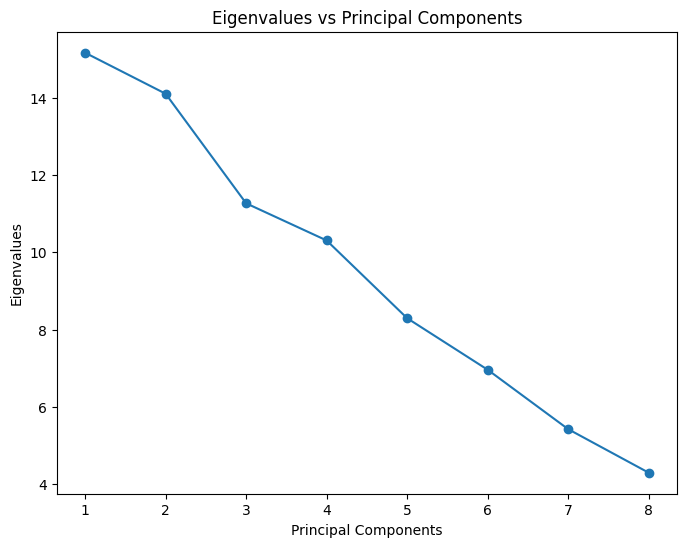

In [196]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 9), eigenvalues[0:8], marker='o')
plt.title('Eigenvalues vs Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.show()

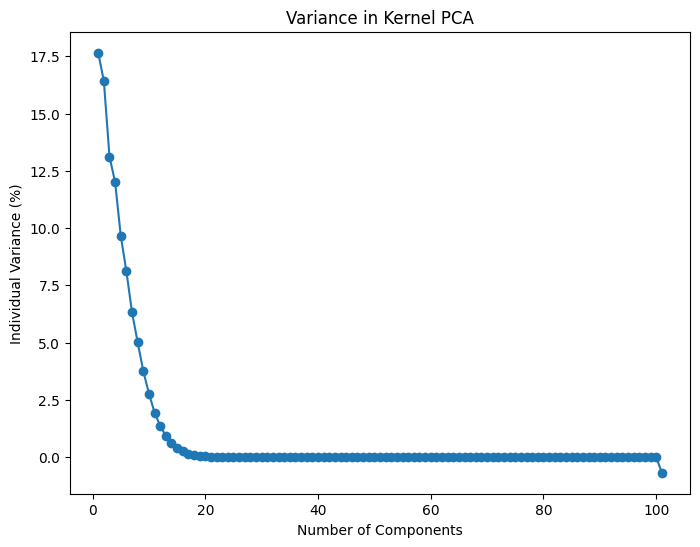

In [197]:
explained_variance_ratio = eigenvalues*100 / np.sum(eigenvalues)

# Plot the percentage of variance captured
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title('Variance in Kernel PCA')
plt.xlabel('Number of Components')
plt.ylabel('Individual Variance (%)')
plt.show()

In [198]:
n_components = 6
gamma = 3
kpca = KernelPCA(n_components=n_components, kernel='precomputed')
df_kpca = kpca.fit_transform(kernel_matrix)

# plt.figure(figsize=(8, 6))
# plt.scatter(df_kpca[:, 0], df_kpca[:, 1])
# # for i, txt in enumerate(df.index):
# #     plt.annotate(txt, (df_kpca[i, 0] + 0.02, df_kpca[i, 1]))

# plt.title('Kernel PCA Scores Plot')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.show()

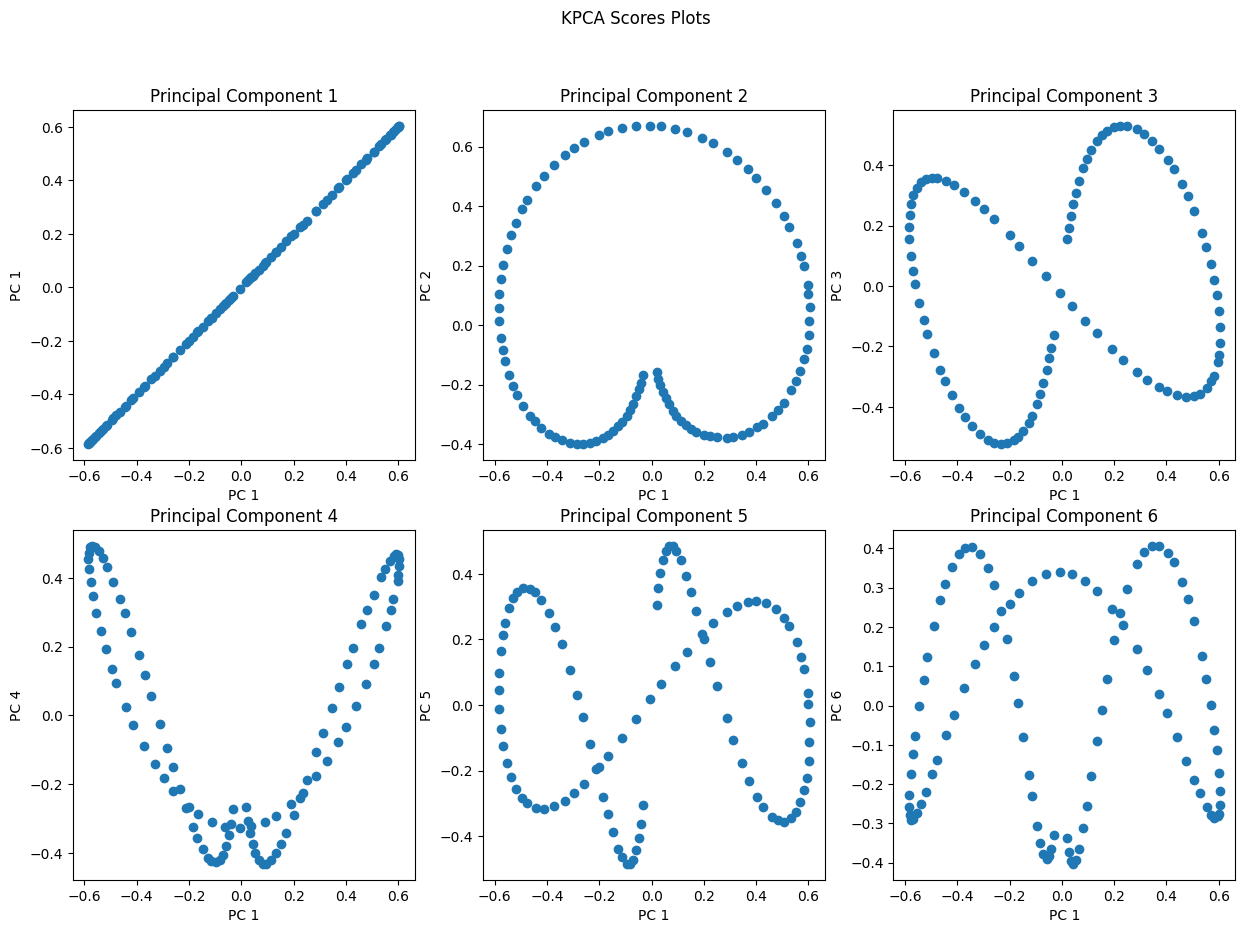

In [199]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('KPCA Scores Plots')

for i, ax in enumerate(axes.flat):
    if i < n_components:
        ax.scatter(df_kpca[:, 0], df_kpca[:, i])
        ax.set_title(f'Principal Component {i+1}')
        ax.set_xlabel('PC 1')
        ax.set_ylabel(f'PC {i+1}')

plt.show()